## Data Visualization

In [1]:
# First of all, we import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Configure how we want the graphics to be displayed.
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

In [4]:
pwd!

'/Users/awalsh/IRONHACK/PROYECTOS/Data-cleaning-Pandas'

In [5]:
#Import DataFrame
df2 = pd.read_csv('data/clean_df2.csv', encoding = "ISO-8859-1")

In [6]:
df2

,Unnamed: 0,Year,Continent,Activity,Sex,Age,Fatal(Y/N),Time,Species
0,0,2018,North America,Other,F,57,N,18h00,White
1,1,2018,North America,Other,F,11,N,14h00 -15h00,Unknown
2,2,2018,North America,Surf,M,48,N,07h45,Unknown
3,3,2018,Oceania,Surf,M,Unknown,N,NaN,Unknown
4,4,2018,North America,Diving,M,Unknown,N,NaN,Tiger
...,...,...,...,...,...,...,...,...,...
6225,6298,Unknown,Oceania,Diving,M,Unknown,Y,NaN,Unknown
6226,6299,Unknown,North America,Bathing,M,Unknown,Y,NaN,Unknown
6227,6300,Unknown,North America,Unknown,M,Unknown,Y,NaN,Unknown
6228,6301,Unknown,Unknown,Bathing,M,15,Y,NaN,Unknown


### H1: Most fatal shark attacks occur in men.

In [7]:
# First of all, we remove the category Unknown.
df2_age = df2[(df2["Fatal(Y/N)"] != "UNKNOWN") & (df2["Sex"] != "Unknown")]

<AxesSubplot:xlabel='Fatal(Y/N)', ylabel='count'>

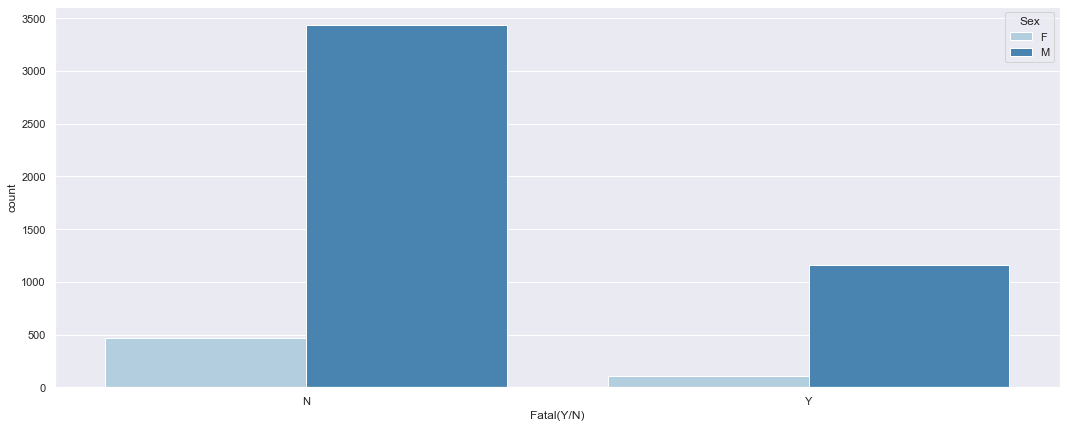

In [79]:
#To prove our hypothesis we visualize the count of Fatal(Y/N) and Sex values.
sns.countplot(data=df2_age, x="Fatal(Y/N)", hue="Sex", palette="Blues")

This graph shows a representation of the fatality of shark attacks ("Fatal(Y/N") dependindg on the sex ("Sex").After looking at the plot we can observe that most fatal attacks occur in men. 
This confirms our first hypothesis: "Most fatal shark attacks occur in men."

### H2.  Most attacks occur in Oceania and South Africa on surfers.

In [13]:
#We delete the Unknown values from df2.
continent_activity = df2[(df2["Continent"] != "Unknown") & (df2["Continent"] != "Unknown")]

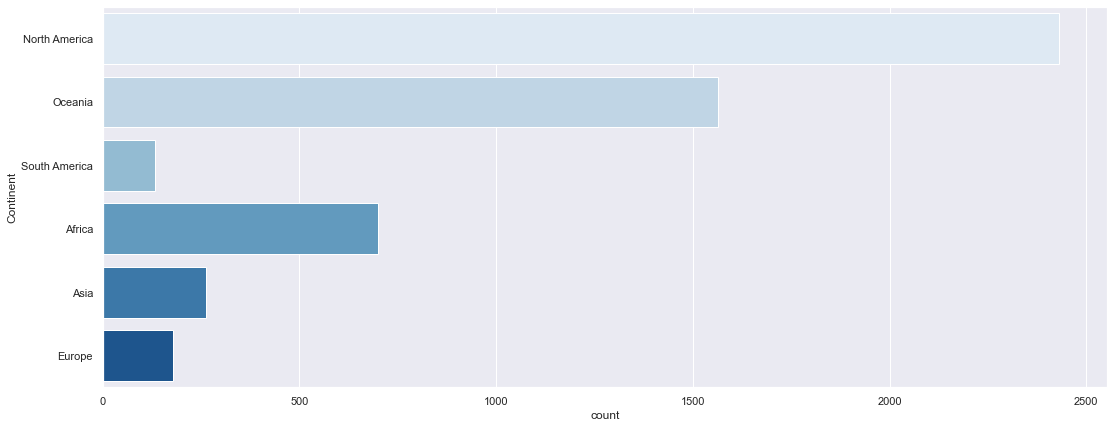

In [78]:
#We use sns.countplot to represent the attacks in each continent.
sns.countplot(y="Continent", data=continent_activity, palette="Blues");

most of them occur in North America.

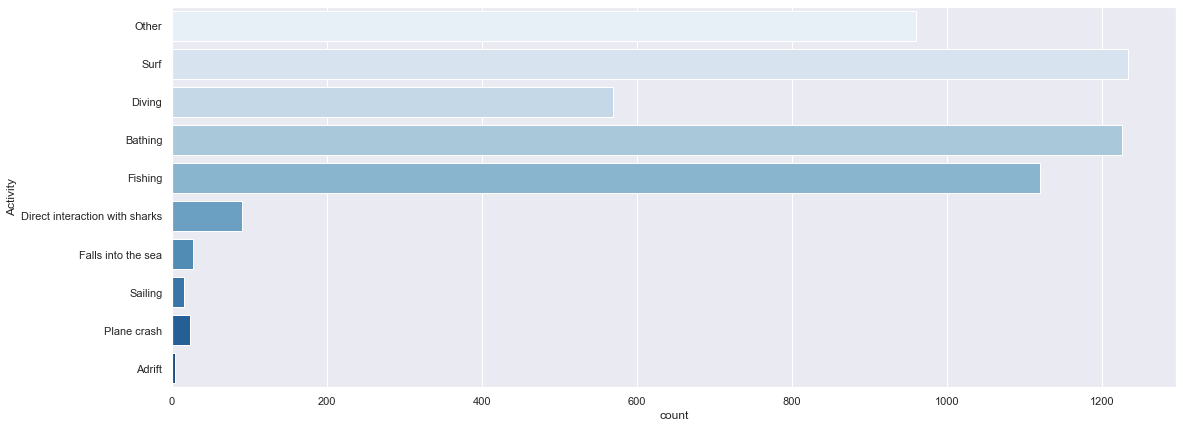

In [75]:
#We use sns.countplot to represent the attacks depending on the activity.
sns.countplot(y="Activity", data=continent_activity,palette="Blues");

This graph shows a representation shark attacks in each continent. As we can see, most of them occur in people that are bathing in the sea (swimming, paddeling, in the water up to the knees, floating in the sea...), followed by surfers.

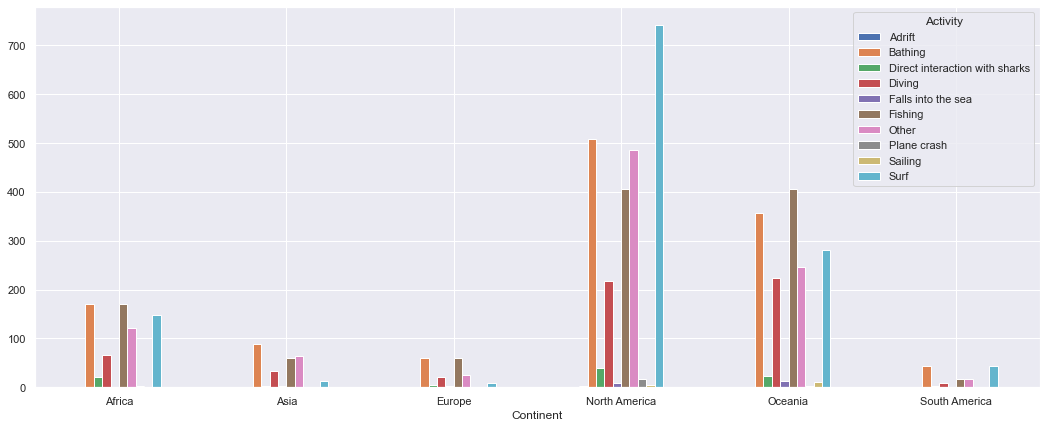

In [67]:
#We use "groupby" to represent the attacks dependind on the activities in each continent.
continent_activity = df2[(df2["Continent"] != "Unknown") & (df2["Activity"] != "Unknown")]
sns.set(rc={"figure.figsize": (18.,7.)})
country_activity = continent_activity.groupby(["Continent", "Activity"])["Activity"].count().unstack().plot(kind="bar")
plt.xticks(rotation=0);
plt.show()

This graph represents shark attacks depending on the Activity and Continent. As it shows, most of the attacks occur in North America followed by Oceania. People that suffer these attacks are usually surfers. 

## H3. Great white sharks are responsible for most of the attacks occurring in Oceania.

In [68]:
# First of all, we need to specify that we only want to check the most common species in Oceania.
# We specify n=5 (number of species) we want the graph to show.
n = 5
attacks_species = oceania_species['Species'].value_counts()[:n].index.tolist()
tiburones

['White', 'Tiger', 'Bronze', 'Grey', 'Wobbegong']

In [36]:
oceania_species = df2[(df2["Continent"] == "Oceania") & (df2["Species"].isin(['White', 'Tiger', 'Bronze', 'Grey', 'Wobbegong']))]


In [38]:
#We check the unique values for "Species" that we have in "oceania_species".
oceania_species.Species.unique()

array(['Grey', 'White', 'Wobbegong', 'Bronze', 'Tiger'], dtype=object)

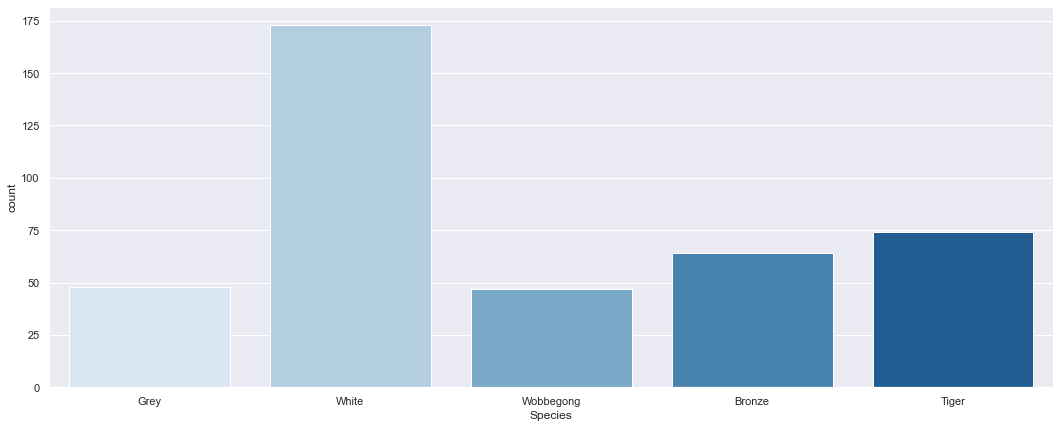

In [76]:
#We represent the five species responsible for most of the shark attacks in Oceania.
sns.set(rc={"figure.figsize": (18.,7.)})
sns.countplot(x="Species", data = oceania_species, palette="Blues")
plt.show()

This graph represents shark attacks depending on the species and Continent. As it shows, most of the attacks occur in North America followed by Oceania. People that suffer these attacks are usualli surfing.